<a href="https://colab.research.google.com/github/Swastik02aug/Mobile-price-range-prediction/blob/main/Mobile_Price_Range_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Mobile Price Range Pridiction


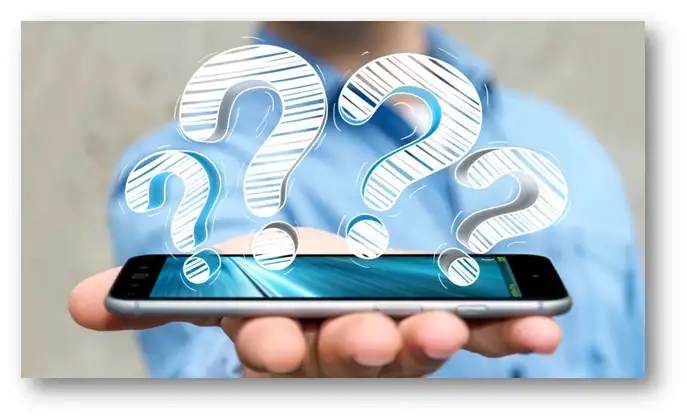



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name -**          -Swastik Chaurasia


# **Project Summary -**

Mobile phones come in all sorts of prices, features, specifications and all. Price estimation and prediction is an important part of consumer strategy. Deciding on the correct price of a product is very important for the market success of a product. A new product that has to be launched, must have the correct price so that consumers find it appropriate to buy the product.we looked at classification. Classifiers represent the intersection of advanced machine theory and practical application. These algorithms are more than just a sorting mechanism for organising unlabeled data instances into distinct groupings. Classifiers include a unique set of dynamic rules that include an interpretation mechanism for dealing with ambiguous or unknown values, all of which are suited to the kind of inputs being analysed. Most classifiers also utilise probability estimates, which enable end-users to adjust data categorization using utility functions.And these classifiers methods helps us to predict the price range for mobile.

# **GitHub Link -**

https://github.com/Swastik02aug/Mobile-price-range-prediction/blob/d30735f1d9dbfa1636bd6f45ed60997703a470cb/Mobile_Price_Range_Prediction_Project.ipynb

# **Problem Statement**


**In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices .The objective is to find out some relation between features of a mobile phone (eg:-RAM,INTERNAL MEMORY ,etc) and its selling price .In this problem ,we do not have to predict the actual price but a price range indicating how  high  the price is.**


Data Description -

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np                                          #importing for Numerical computations
import pandas as pd                                         #importing Data manipulations
import matplotlib.pyplot as plt                             #importing for visualize with plots
import seaborn as sns
from sklearn.preprocessing import StandardScaler            #importing  for Scaling data
from sklearn.model_selection import cross_val_score         #importing  for cross validation
from sklearn.model_selection import GridSearchCV            #importing to find the best values for hyperparameters of a model

import warnings
warnings.filterwarnings("ignore")                           #importing for disable  warnings

### Dataset Loading

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# loading csv file
df=pd.read_csv('/content/drive/MyDrive/classification ml project/data_mobile_price_range.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()
#Return the first 5 rows of the DataFrame

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape
#return the (number of rows,number of columns)

There are 2000 rows and 21 columns in the given data sets.

### Dataset Information

In [ ]:
# Dataset Info
df.info()
#it is used to provides details about each columns .

From the above we find that there no null values present in the given data set and only two types of data are present i.e;integers and float.

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value 
df.duplicated()
# it is uesd to return the boolean output such as True for duplicated values otherwise False


In [ ]:
# here we fining out the lenght of the duplicate values 
len(df[df.duplicated()])

Hence there is no duplicate values present in the given data set.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()
#it is used to return the number of sum of all missing values in the columns of the given data set.

There is no null values  found in any columns of the given data sets.


### What did you know about your dataset?

From the given data set we find that there is no duplicated as well as no missing values present in the given data set .And there are only two types of data set are present i.e; integers and float.There are 2000 rows and 21 columns in the dataframe.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
c=list(df.columns)
print(c)

In [ ]:
# Dataset Describe
df.describe(include='all').T
#.T is used to transepose the data frame
# it is used to provides the no. of element present in every columns,mean,standard deviation,minimum,maximum  and etc 

From the above we find that minimum value of px_height and sc_w cannot be zero ,which can't be so we need to handle that .

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()
# it is used to print the number of unique values in each columns of the data set.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#.tail is used to return the last 5 rows of the data
df.tail()

In [ ]:
binary_features1 = ['blue', 'four_g', 'three_g','dual_sim','touch_screen','wifi']
normal_feature=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','px_height','px_width','ram','talk_time','price_range' ]  
binary_features=pd.DataFrame(binary_features1)
normal_feature=pd.DataFrame(normal_feature)


### What all manipulations have you done and insights you found?

Here we differ the boolean data and normal data ,it will help out to analysis the data more accurately.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
#bar plot of price range
sns.set()
price_plot=df['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

 The barplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution. The seaborn. barplot() function accepts the data variable as an argument and returns the plot with the density distribution.

##### 2. What is/are the insight(s) found from the chart?

So, there are mobile phones in 4 price ranges. The number of elements is almost similar.

#### Chart - 2

In [ ]:
#Let us analyse some data features(normal features) and see their distribution.
c=df[normal_feature]
for a in c:
  sns.set(rc={'figure.figsize':(5,5)})
  ax=sns.displot(data=df[a])
  plt.show()

##### 1. Why did you pick the specific chart?

The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution. The seaborn. distplot() function accepts the data variable as an argument and returns the plot with the density distribution. We have used the numpy.

##### 2. What is/are the insight(s) found from the chart?

From the above plot we find that the data are not normally distributed i.e; some are right,left skewed.

#### Chart - 3

In [ ]:
# check for existence of correlation
plt.figure(figsize=(20,10))
plt.title('Correlation Heatmap')
cor=df.corr()
sns.heatmap(abs(cor), annot = True, cmap='YlGnBu')

##### 1. Why did you pick the specific chart?

Heat map analysis is the process of reviewing and analyzing heat map data to gather insights about user interaction and behavior as they engage with your product. This data analysis can lead to improved site designs with lower bounce rates, reduced churn, fewer drop-offs, more pageviews, and better conversion rates.

##### 2. What is/are the insight(s) found from the chart?

From the heatmap we find that pc and tc and 4g and 3g are correlated with each other.And ram and price range very high correlated with each other ,we can't drop the ram columns because it play very vital role in predicting the price  of the mobile phones.


##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

The stronger the correlation, the more difficult it is to change one variable without changing another. It becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable independently because the independent variables tend to change in unison.

#### Chart - 4

In [ ]:
#checking for outliers

plt.figure(figsize=(25,10))
for index,item in enumerate([i for i in df.describe().columns.to_list()] ):
  plt.subplot(5,5,index+1)
  sns.boxplot(df[item])
print("\n")
plt.show()


##### 1. Why did you pick the specific chart?

Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

##### 2. What is/are the insight(s) found from the chart?

From the above plot we find that there is no out liers are present in the given data sets.

#### Chart - 5

In [ ]:
for col in binary_features1:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 6))

  df[col].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1, shadow=True, labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = col, hue = 'price_range', data = df, ax = ax2, color = 'green')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(col)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])

##### 1. Why did you pick the specific chart?

A pie chart, sometimes called a circle chart, is a way of summarizing a set of nominal data or displaying the different values of a given variable (e.g. percentage distribution). This type of chart is a circle divided into a series of segments. Each segment represents a particular category

##### 2. What is/are the insight(s) found from the chart?

Here we find out that price distribution with and without binary data sets.

# Chart-6

In [ ]:
# Checking the null values using heatmap
# There is any null values are occupyed here
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

Hence there is no null values are present.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
#finding out no. of px_height and sc_w which cannot be zero
a=len(df[df.px_height==0])
b=len(df[df.sc_w==0])
print('no. pixel height equal to zero:',a)
print('no. screen width equal to zero:',b)

#assigning the new value (mean value) to the zero.
mean1=df.px_height.mean()
mean2=df.sc_w.mean()
df['sc_w'][df[df.sc_w == 0].index] = mean1
df['px_height'][df[df.px_height == 0].index] = mean2

#### What all missing value imputation techniques have you used and why did you use those techniques?

From the above we find that minimum value of px_height(pixel height ) and sc_w(screen width) cannot be zero ,which can't be so we need to handle that . so we have to remove those zeroes with mean .

### 2. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
from matplotlib.axes import BarContainer
# Manipulate Features to minimize feature correlation and create new features
#screen size is equal to the diagonal of the screen in inches
#1 cm =.393 inches
#diagonal=sqrt((df.sc_h*.393)^2+(df.sc_w*.393)^2)
#df['screen_size']=(df.sc_h*df.sc_w))
import math as m
sc_h_i=.393*df.sc_h
sc_w_i=.393*df.sc_w
a=sc_h_i**2
b=sc_w_i**2
c=a+b

df['screen_size']=(np.sqrt(c))
df.drop('sc_w',axis=1,inplace=True)
df.drop('sc_h', axis=1,inplace=True)




In [ ]:
#calculating the pixel
df['pixel']=df.px_height*df.px_width
df.drop('px_height',axis=1,inplace=True)
df.drop('px_width', axis=1,inplace=True)


In [ ]:
df.columns

In [ ]:
len(df.columns)

#### 2. Feature Selection

In [ ]:
# Lets try to understand which are important feature for this dataset
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
X = pd.DataFrame(df.drop('price_range',axis=1).values)  # Independent columns
y = pd.DataFrame(df['price_range'].values)  # Y target column i.e price range

In [ ]:
# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['spaces','score'] #naming the dataframe columns
featureScores

In [ ]:
print(featureScores.nlargest(10,'score')) #print 10 best features

In [ ]:
# Select your features wisely to avoid overfitting
selected_feature=df.iloc[:,[0,11,16,8,6,13,4,10,9,15]]
selected_feature


##### What all feature selection methods have you used  and why?

Feature selection is used to make the process more accurate. It also increases the prediction power of the algorithms by selecting the most critical variables and eliminating the redundant and irrelevant one

##### Which all features you found important and why?

From the above found that features like-battery power,ram,screen size play very important role for predicting the price of a mobile.

### 8. Data Splitting

In [ ]:
df.columns

In [ ]:
# Let's create numpy arrays for features and target
X =selected_feature.drop('price_range',axis=1).values
y = selected_feature['price_range'].values

In [ ]:
# Importing train_test_split
from sklearn.model_selection import train_test_split


In [ ]:
# splitting the dataset into the training set and test set 
# splitting the Train test data with 80 - 20


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [ ]:
# Shape of the Training and Test dataset
print("Shape of the X_train dataset :",X_train.shape)
print("Shape of the X_test dataset :",X_test.shape)
print("Shape of the y_train dataset :",y_train.shape)
print("Shape of the y_test dataset :",y_test.shape)

##### What data splitting ratio have you used and why? 

A commonly used ratio is 80:20, which means 80% of the data is for training and 20% for testing. Other ratios such as 70:30, 60:40, and even 50:50 are also used in practice. There does not seem to be clear guidance on what ratio is best or optimal for a given data

## ***7. ML Model Implementation***

### ML Model - 1
# Random Forest Classifier

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

Hyperparameter tuning is the answer for any such question where we want to boost the performance of a model without any change in the dataset available. But before exploring which hyperparameters can help us let’s understand how the random forest model works.

A random forest model is a stack of multiple decision trees and by combining the results of each decision tree accuracy shot up drastically. Based on this simple explanation of the random forest model there are multiple hyperparameters that we can tune while loading an instance of the random forest model which helps us to prune overfitting

In [ ]:
#importing libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
#fitting the model
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

#score
rf=rfc.score(X_test,y_test)
rf

### ML Model - 2
# Logistic Regression model


Machine learning has revolutionized the world of business and is helping us build sophisticated applications to solve tough business problems. Using supervised and unsupervised machine learning models, you can solve problems using classification, regression, and clustering algorithms. In this article, we’ll discuss a supervised machine learning algorithm known as logistic regression in Python. Logistic regression can be used to solve both classification and regression problems.

Logistic regression is a statistical method that is used for building machine learning models where the dependent variable is dichotomous: i.e. binary. Logistic regression is used to describe data and the relationship between one dependent variable and one or more independent variables. The independent variables can be nominal, ordinal, or of interval type.

The name “logistic regression” is derived from the concept of the logistic function that it uses. The logistic function is also known as the sigmoid function. The value of this logistic function lies between zero and one.

The following is an example of a logistic function we can use to find the probability of a vehicle breaking down, depending on how many years it has been since it was serviced last.

In [ ]:
#Creating & Training Logistic Regression model


#importing libraries
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

#fitting the data
logmodel.fit(X_train,y_train)

#score
lor=logmodel.score(X_test,y_test)
lor


# **ML Model - 2**
# Linear regression

Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between dependent and independent variables they are considering, and the number of independent variables getting used. There are many names for a regression’s dependent variable.  It may be called an outcome variable, criterion variable, endogenous variable, or regressand.  The independent variables can be called exogenous variables, predictor variables, or regressors.

In [ ]:
#linear regression
X=df.drop('price_range',axis=1)
y=df['price_range']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
lr=lm.score(X_test,y_test)
lr

In [ ]:
#RESULT : Linear Regression¶
y_pred=lm.predict(X_test)
plt.scatter(y_test,y_pred)

### ML Model - 3

# K-Nearest Neighbors:

It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining and intrusion detection. The K-Nearest Neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems. The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other. KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points on a graph

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#importing libraries
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

#fitting the data
knn.fit(X_train,y_train)
kn=knn.score(X_test,y_test)
kn


In [ ]:

#Elbow Method For optimum value of K
error_rate = []
for i in range(1,20):
    
  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

print( pred_i)

#ploting the data
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')    

In [ ]:
#RESULT: KNN
from sklearn.metrics import classification_report,confusion_matrix
pred = knn.predict(X_test)
print(classification_report(y_test,pred))

matrix=confusion_matrix(y_test,pred)
print(matrix)

plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)

# **Model-4**
# Decision Tree

Decision tree algorithm falls under the category of supervised learning. They can be used to solve both regression and classification problems. Decision tree uses the tree representation to solve the problem in which each leaf node corresponds to a class label and attributes are represented on the internal node of the tree. We can represent any boolean function on discrete attributes using the decision tree.

In [ ]:
#Creating & Training Decision Tree Model

# importing libraries
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()


#fitting the data
dtree.fit(X_train,y_train)

#score
dt=dtree.score(X_test,y_test)
dt

score chart

In [ ]:
#each model score
print('decision tree score:{0}\n knn score :{1}\n logistic regression score:{2}\n linear regression score:{3}\n random forest model score :{4}'.format(dt*100,kn*100,lor*100,lr*100,rf*100))



### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Confusion matrix:
It is a table that is used in classification problems to assess where errors in the model were made. The rows represent the actual classes the outcomes should have been. While the columns represent the predictions we have made.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

K-Nearest Neighbors Algorithm. The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

K-Nearest Neighbors Algorithm is used for prediction,top 10 features -battery_power,	ram	,price_range,	mobile_wt,	int_memory,	three_g	,fc,	pc	n_cores,	wifi play a very important role in predicing the price .

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
import pickle
pickle.dump(knn, open('model.pkl', 'wb'))


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)

In [ ]:
# Load the File and predict unseen data.
df2=pd.read_csv('/content/drive/MyDrive/classification ml project/data_mobile_price_range.csv')

In [ ]:
df2.head()

In [ ]:
from matplotlib.axes import BarContainer
# Manipulate Features to minimize feature correlation and create new features
#screen size is equal to the diagonal of the screen in inches
#1 cm =.393 inches
#diagonal=sqrt((df.sc_h*.393)^2+(df.sc_w*.393)^2)
#df['screen_size']=(df.sc_h*df.sc_w))
import math as m
sc_h_i=.393*df2.sc_h
sc_w_i=.393*df2.sc_w
a=sc_h_i**2
b=sc_w_i**2
c=a+b

df2['screen_size']=(np.sqrt(c))
df2.drop('sc_w',axis=1,inplace=True)
df2.drop('sc_h', axis=1,inplace=True)


In [ ]:
df2.shape

In [ ]:
#Model
predicted_price=knn.predict(df2)

In [ ]:
#Predicted Price Range
predicted_price

In [ ]:
#Adding Predicted price to test.csv
df['price_range']=predicted_price

In [ ]:
df2.insert( 0,column = "predicted_price", value = predicted_price)

In [ ]:
predicted_price.shape

In [ ]:
df2.shape

In [ ]:
df2.head()

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**



From EDA we can see that here are mobile phones in 4 price ranges. The number of elements is almost similar.
half the devices have Bluetooth, and half don’t
there is a gradual increase in battery as the price range increases
Ram has continuous increase with price range while moving from Low cost to Very high cost
costly phones are lighter
RAM, battery power, pixels played more significant role in deciding the price range of mobile phone.
From all the above experiments we can conclude that knn and linear regression have high score and we got the best results.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***